In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [133]:
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold,KFold
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [106]:
x = pd.read_csv("/kaggle/input/features/SelectedFeaturesAlexFinal.csv")
# x = pd.read_csv("../input/selectedfeaturesalexnet/SelectedFeaturesAlex.csv")
y = pd.read_csv("/kaggle/input/features/FeatureTargetAlexFinal.csv")

In [107]:
x.head()

,AlexNet_F1,AlexNet_F2,AlexNet_F3,AlexNet_F4,AlexNet_F5,AlexNet_F6,AlexNet_F7,AlexNet_F8,AlexNet_F9,AlexNet_F10,...,AlexNet_F209,AlexNet_F210,AlexNet_F212,AlexNet_F213,AlexNet_F215,AlexNet_F223,AlexNet_F229,AlexNet_F232,AlexNet_F233,AlexNet_F234
0,9.251012,0.000000,0.000000,2.007032,0.778149,0.000000,12.605089,0.964466,120.253502,8.657366,...,0.041084,0.015409,0.0,1.841805,1.718527,3.890700,0.104252,1.192303,0.000000,137.407394
1,5.727812,0.179868,0.000000,2.665178,0.105641,0.000000,7.027221,6.673501,89.945801,8.793799,...,0.119108,0.170726,0.0,0.525273,0.938171,0.328787,0.164782,1.393854,0.020071,213.790466
2,3.644517,0.000000,0.000000,0.018887,0.615991,0.179507,3.901660,0.480901,91.796822,7.214131,...,0.142237,0.006751,0.0,2.182922,0.586873,3.936515,0.159546,2.130890,0.000000,138.111145
3,10.097808,1.647023,1.263728,6.283468,1.653710,0.007241,22.692371,6.878913,125.982735,14.232286,...,0.939127,0.006417,0.0,0.895403,3.486200,2.879364,0.000000,1.864147,0.380142,166.281860
4,15.963028,0.367383,0.000000,1.058157,0.579568,0.000000,13.060380,6.509429,148.535797,11.979020,...,0.772520,0.037779,0.0,1.767945,2.905973,4.713258,0.020268,2.638671,0.000000,277.671417


In [108]:
x.shape,y.shape

((250, 117), (250, 1))

In [109]:
# y = label_binarize(y, classes=[0,1])
y[:5]

,class
0,0
1,0
2,0
3,0
4,0


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify = y,random_state=322)


In [111]:
input_shape = x_train.shape[1]
input_shape

117

In [112]:
# def createModel():
#     model = keras.Sequential([
# #     layers.Dense(50, activation='sigmoid',input_shape=[input_shape]),
# #     layers.BatchNormalization(),
# #     layers.Dropout(rate=0.5),
#     layers.Dense(20, activation='sigmoid'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate=0.5),
# #     layers.Dense(10, activation='sigmoid'),
# #     layers.BatchNormalization(),
# #     layers.Dropout(rate=0.2),
#     layers.Dense(1,'sigmoid')
#     ])
    
#     return model

def createModel():
    model = keras.Sequential([
    layers.Dense(60, activation='relu',input_shape=[input_shape]),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),
#     layers.Dense(10, activation='sigmoid'),
#     layers.BatchNormalization(),
#     layers.Dropout(rate=0.2),
    layers.Dense(1,'sigmoid')
    ])
    
    return model



In [113]:
# keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [114]:

# # optimizer = keras.optimizers.Adam(learning_rate=0.5)
# optimizer = keras.optimizers.Adam(learning_rate = 0.005)
# model.compile(
#     optimizer=optimizer,
#     loss='categorical_crossentropy',
#     metrics=['categorical_accuracy'],
# )

In [115]:
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.0001,
#     restore_best_weights=True,
# )

# history = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     batch_size=30,
#     epochs=500,
# #     callbacks=[early_stopping],
#     verbose=1, # hide the output because we have so many epochs
# )

# #batch_size = 10, epochs = 100

In [116]:
kf = KFold(n_splits=10)
fold = 0
res = []
loss = []
acc = []
models = []

for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    optimizer = keras.optimizers.Adam(learning_rate = 0.001)
    
    model = createModel()
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
    )

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        batch_size=60,
        epochs=100,
        shuffle = True,
    #     callbacks=[early_stopping],
        verbose=0, # hide the output because we have so many epochs
    )
    
    history_df = pd.DataFrame(history.history)
    loss_curr = history_df['val_loss'].min()
    acc_curr = history_df['val_accuracy'].max()
    
    print('Fold',fold)
    print('Val loss',loss_curr)
    print('Val accuracy',acc_curr)
    print('------------------')
    
    fold += 1
    
    loss.append(loss_curr)
    acc.append(acc_curr)
    res.append(history)
    models.append(model)
    
    

Fold 0
Val loss 0.6646296977996826
Val accuracy 0.6399999856948853
------------------
Fold 1
Val loss 0.6195595264434814
Val accuracy 0.7599999904632568
------------------
Fold 2
Val loss 0.6777486205101013
Val accuracy 0.6399999856948853
------------------
Fold 3
Val loss 0.8078160285949707
Val accuracy 0.5199999809265137
------------------
Fold 4
Val loss 0.6729789972305298
Val accuracy 0.6800000071525574
------------------
Fold 5
Val loss 0.6219009160995483
Val accuracy 0.7599999904632568
------------------
Fold 6
Val loss 0.7607220411300659
Val accuracy 0.6800000071525574
------------------
Fold 7
Val loss 0.6487559676170349
Val accuracy 0.6800000071525574
------------------
Fold 8
Val loss 0.5884103178977966
Val accuracy 0.7200000286102295
------------------
Fold 9
Val loss 0.7027795314788818
Val accuracy 0.6000000238418579
------------------


Best Validation Loss: 0.6488
Best Validation Accuracy: 0.6800


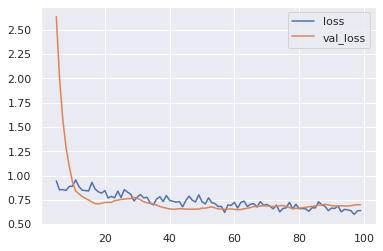

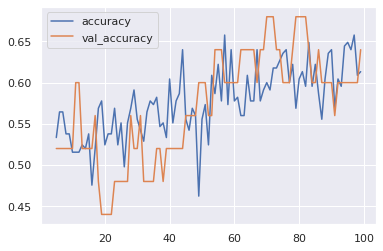

In [117]:
# plot graphs

history_df = pd.DataFrame(res[7].history)
# print(history_df)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

[]

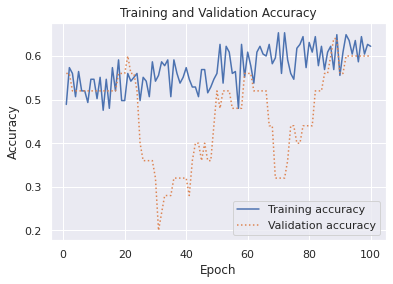

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
hist = res[2]
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

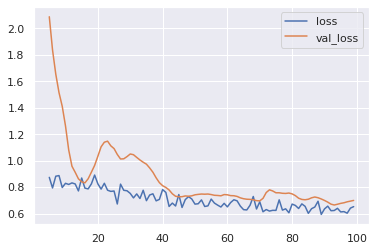

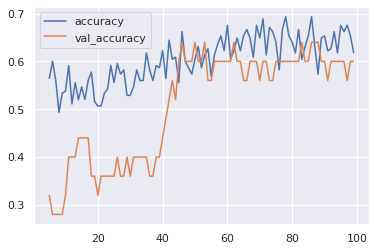

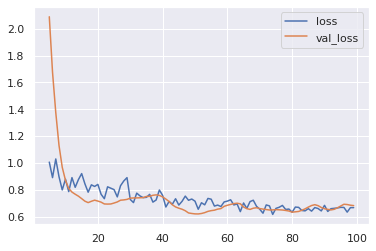

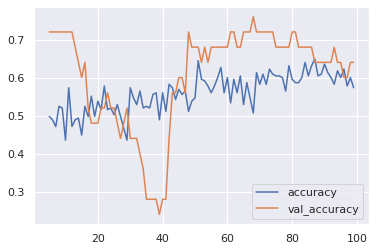

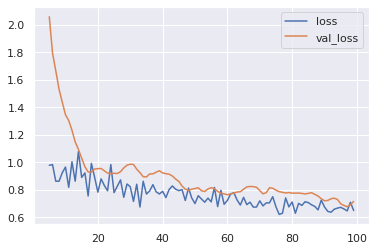

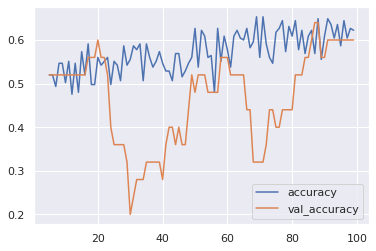

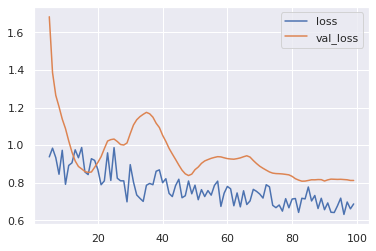

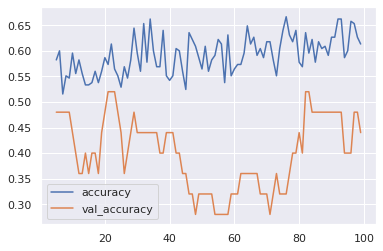

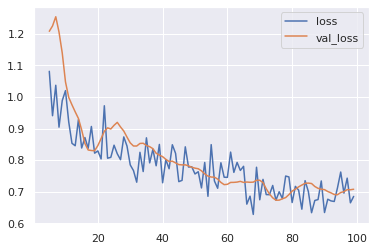

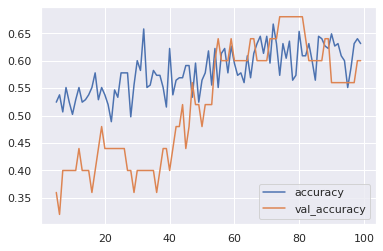

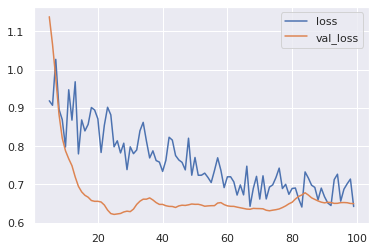

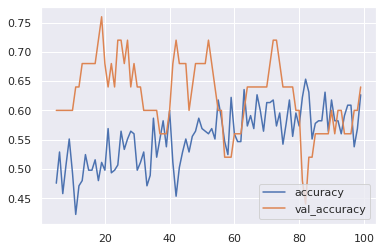

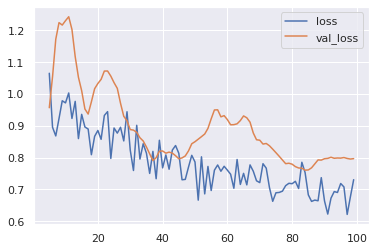

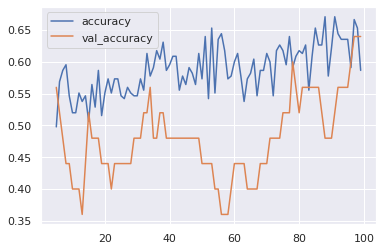

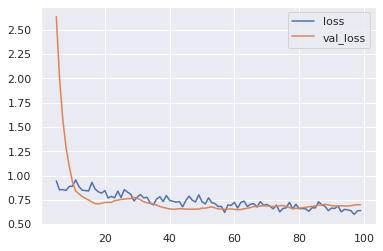

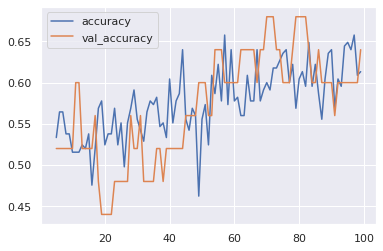

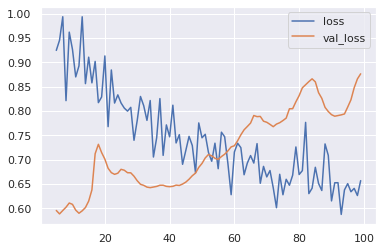

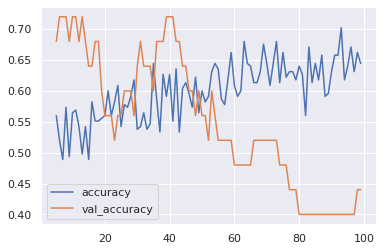

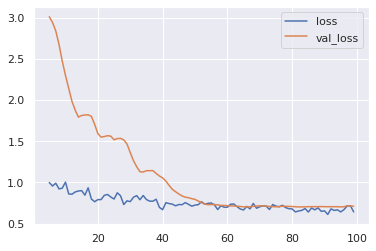

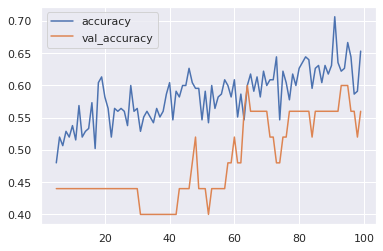

In [119]:
for i in range(len(res)):
#     plt.figure()
    history_df = pd.DataFrame(res[i].history)
    # print(history_df)
    # Start the plot at epoch 5
    history_df.loc[5:, ['loss', 'val_loss']].plot()
    history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()
    

In [142]:
newModel = models[1]

In [143]:
newModel.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 60)                7080      
_________________________________________________________________
batch_normalization_86 (Batc (None, 60)                240       
_________________________________________________________________
dropout_86 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 10)                610       
_________________________________________________________________
batch_normalization_87 (Batc (None, 10)                40        
_________________________________________________________________
dropout_87 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 1)               

In [144]:
newModel.pop()

In [145]:
newModel.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 60)                7080      
_________________________________________________________________
batch_normalization_86 (Batc (None, 60)                240       
_________________________________________________________________
dropout_86 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 10)                610       
_________________________________________________________________
batch_normalization_87 (Batc (None, 10)                40        
_________________________________________________________________
dropout_87 (Dropout)         (None, 10)                0         
Total params: 7,970
Trainable params: 7,830
Non-trainable params: 140
_________________________________________________

In [146]:
newFeatures = newModel.predict(x) 

In [147]:
newFeatures.shape

(250, 10)

In [148]:
newFeaturesDf = pd.DataFrame(newFeatures)

In [149]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

newFeaturesDf = min_max_scaler.fit_transform(newFeaturesDf)

In [150]:
newFeaturesDf = pd.DataFrame(data = newFeaturesDf)

newFeaturesDf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.651412,0.397367,0.293884,0.054779,0.146131,0.000000,0.341880,0.000000,0.000000,0.839725
1,0.000000,0.000000,0.352133,0.000000,0.269946,0.359799,0.661955,0.168151,0.272647,0.000000
2,0.448426,0.049509,0.329397,0.000000,0.094878,0.000000,0.342425,0.000000,0.000000,0.501475
3,0.402377,0.000000,0.076881,0.000000,0.000000,0.045358,0.000000,0.647959,0.114143,0.191069
4,0.206971,0.000000,0.653410,0.458053,0.214750,0.196629,0.745275,0.417903,0.000000,0.000000


In [151]:
merged_df = x.join(newFeaturesDf)

In [152]:
merged_df.shape

(250, 127)

In [153]:
columns = ['Alex_F' + str(i) for i in range(merged_df.shape[1])]
merged_df.to_csv('SelectedFeaturesAlexFinalMerged.csv',index = None,header = columns)

In [154]:
# merged_df.to_csv('SelectedFeaturesAlexDecTreeMerge.csv',index = None,header = columns)